In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for density plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('first_try.keras')

# Load the data from the SQLite database
conn = sqlite3.connect('../../../../data/nfp2/nfp2.db')  # Adjust the path to your database file
query = "SELECT * FROM stellarators"  # Adjust your query as needed
data_df = pd.read_sql_query(query, conn)
conn.close()

# Clean the data
data_df_clean = data_df[data_df['convergence'] == 1]
data_df_clean = data_df_clean.dropna(subset=['quasiisodynamic'])

# Define features (X) and target (Y)
X = data_df_clean[['rbc_1_0', 'rbc_m1_1', 'rbc_0_1', 'rbc_1_1', 'zbs_1_0', 'zbs_m1_1', 'zbs_0_1', 'zbs_1_1']]
Y = np.log(data_df_clean['quasiisodynamic'])

# Split the data into training and testing sets
features_no_outliers, test_features_no_outliers, target_no_outliers, test_target_no_outliers = train_test_split(
    X, Y, test_size=0.2, random_state=42)

2024-07-21 23:36:55.303651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 23:36:55.319328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 23:36:55.324058: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 23:36:55.336831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 23:36:56.205649: W tensorflow/compiler/tf2

  72/1493 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step 

1493/1493 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step
Mean Squared Error: 0.09164087659427494
R^2 Score: 0.978300923784257


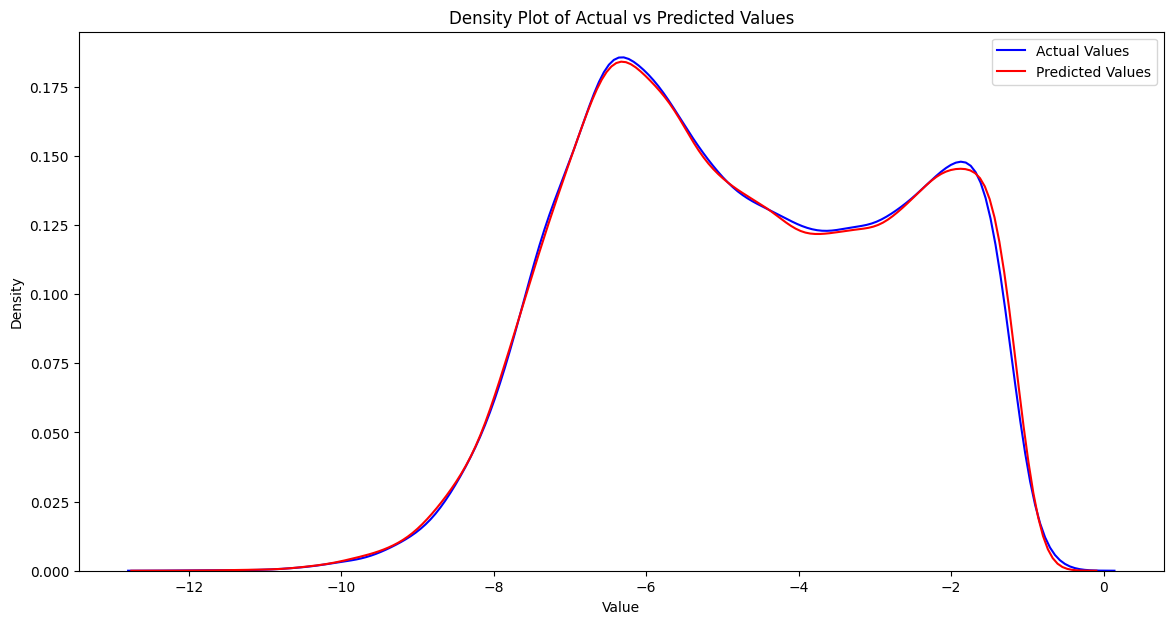

In [2]:
# Make predictions on the test set
predictions = model.predict(test_features_no_outliers).flatten()

# Evaluate the model
mse = mean_squared_error(test_target_no_outliers, predictions)
r2 = r2_score(test_target_no_outliers, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot density plots for predicted and actual values
plt.figure(figsize=(14, 7))

# Plot density for actual values
sns.kdeplot(test_target_no_outliers, label='Actual Values', color='blue', fill=False)

# Plot density for predicted values
sns.kdeplot(predictions, label='Predicted Values', color='red', fill=False)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Values')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
1/1 ━━━━━━━

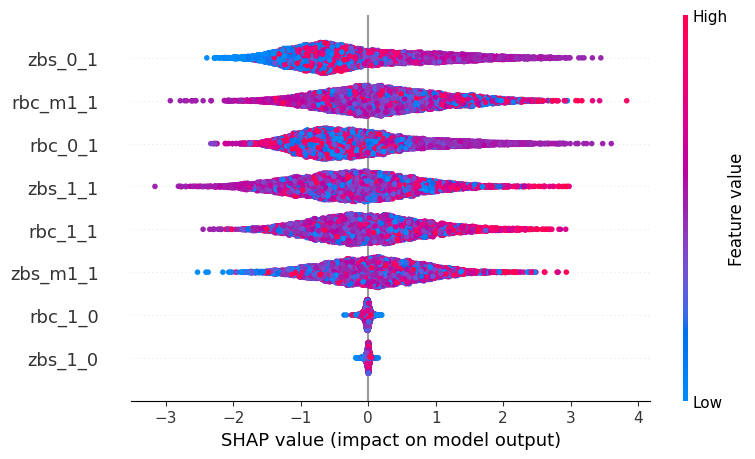

In [10]:
import shap
import numpy as np

# Define a function to get a smaller random sample from the dataset
def get_background_data(X, sample_size=100):
    np.random.seed(42)
    sample_indices = np.random.choice(X.index, size=min(sample_size, len(X)), replace=False)
    return X.loc[sample_indices]

# Create a background dataset by sampling a subset of the original data
background = get_background_data(features_no_outliers, sample_size=10)

# Define the prediction function
def predict_fn(X):
    return model.predict(X).flatten()

# Create the SHAP explainer with the smaller background dataset
explainer = shap.KernelExplainer(predict_fn, background)

# Compute SHAP values for a subset of the test set to reduce computation time
shap_values = explainer.shap_values(test_features_no_outliers.head(10000))

# Plot SHAP values
shap.initjs()
shap.summary_plot(shap_values, test_features_no_outliers.head(10000))
